# Analyzing and Predicting Life Expectancy

Source data: https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated



In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
plt.style.use('default')

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

%matplotlib inline

%config InlineBackend.figure_format = 'retina' # for high resolution

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # to see multiple outputs

###Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data

path = "/content/drive/MyDrive/Life-Expectancy-Data-Updated.csv"
data = pd.read_csv(path)

In [4]:
data.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [5]:
# Dimensions of the dataset

data.shape

(2864, 21)

###Exploratory Data Analysis

In [ ]:
data.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [ ]:
# check for null values

data.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Life_expectancy', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Life Expectancy')

Text(0.5, 0, 'Life Expectancy')

Text(0, 0.5, 'Frequency')

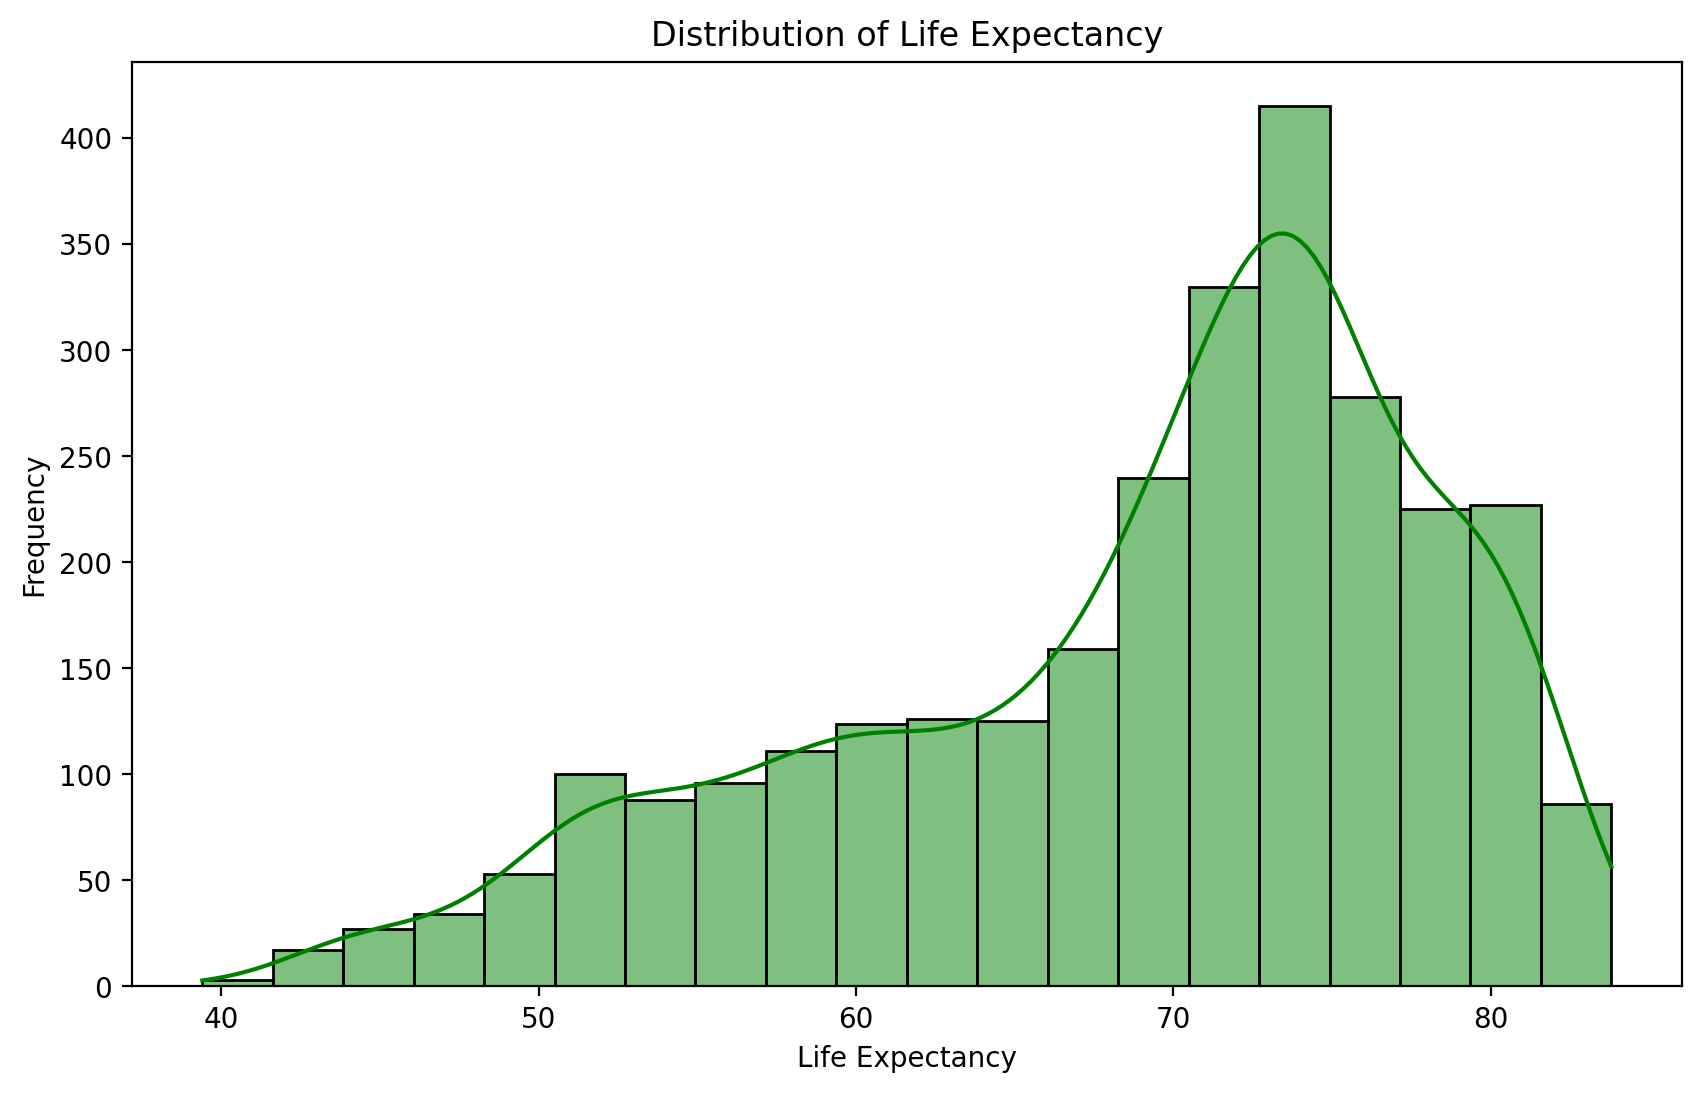

In [ ]:
# Distribution of Life Expectancy

plt.figure(figsize=(10, 6))
sns.histplot(data['Life_expectancy'], bins=20, kde=True, color='g')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Region', ylabel='Life_expectancy'>

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Middle East'),
  Text(1, 0, 'European Union'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Central America and Caribbean'),
  Text(5, 0, 'Rest of Europe'),
  Text(6, 0, 'Africa'),
  Text(7, 0, 'Oceania'),
  Text(8, 0, 'North America')])

Text(0.5, 1.0, 'Distribution of Life Expectancy per Region')

Text(0.5, 0, 'Region')

Text(0, 0.5, 'Life Expectancy')

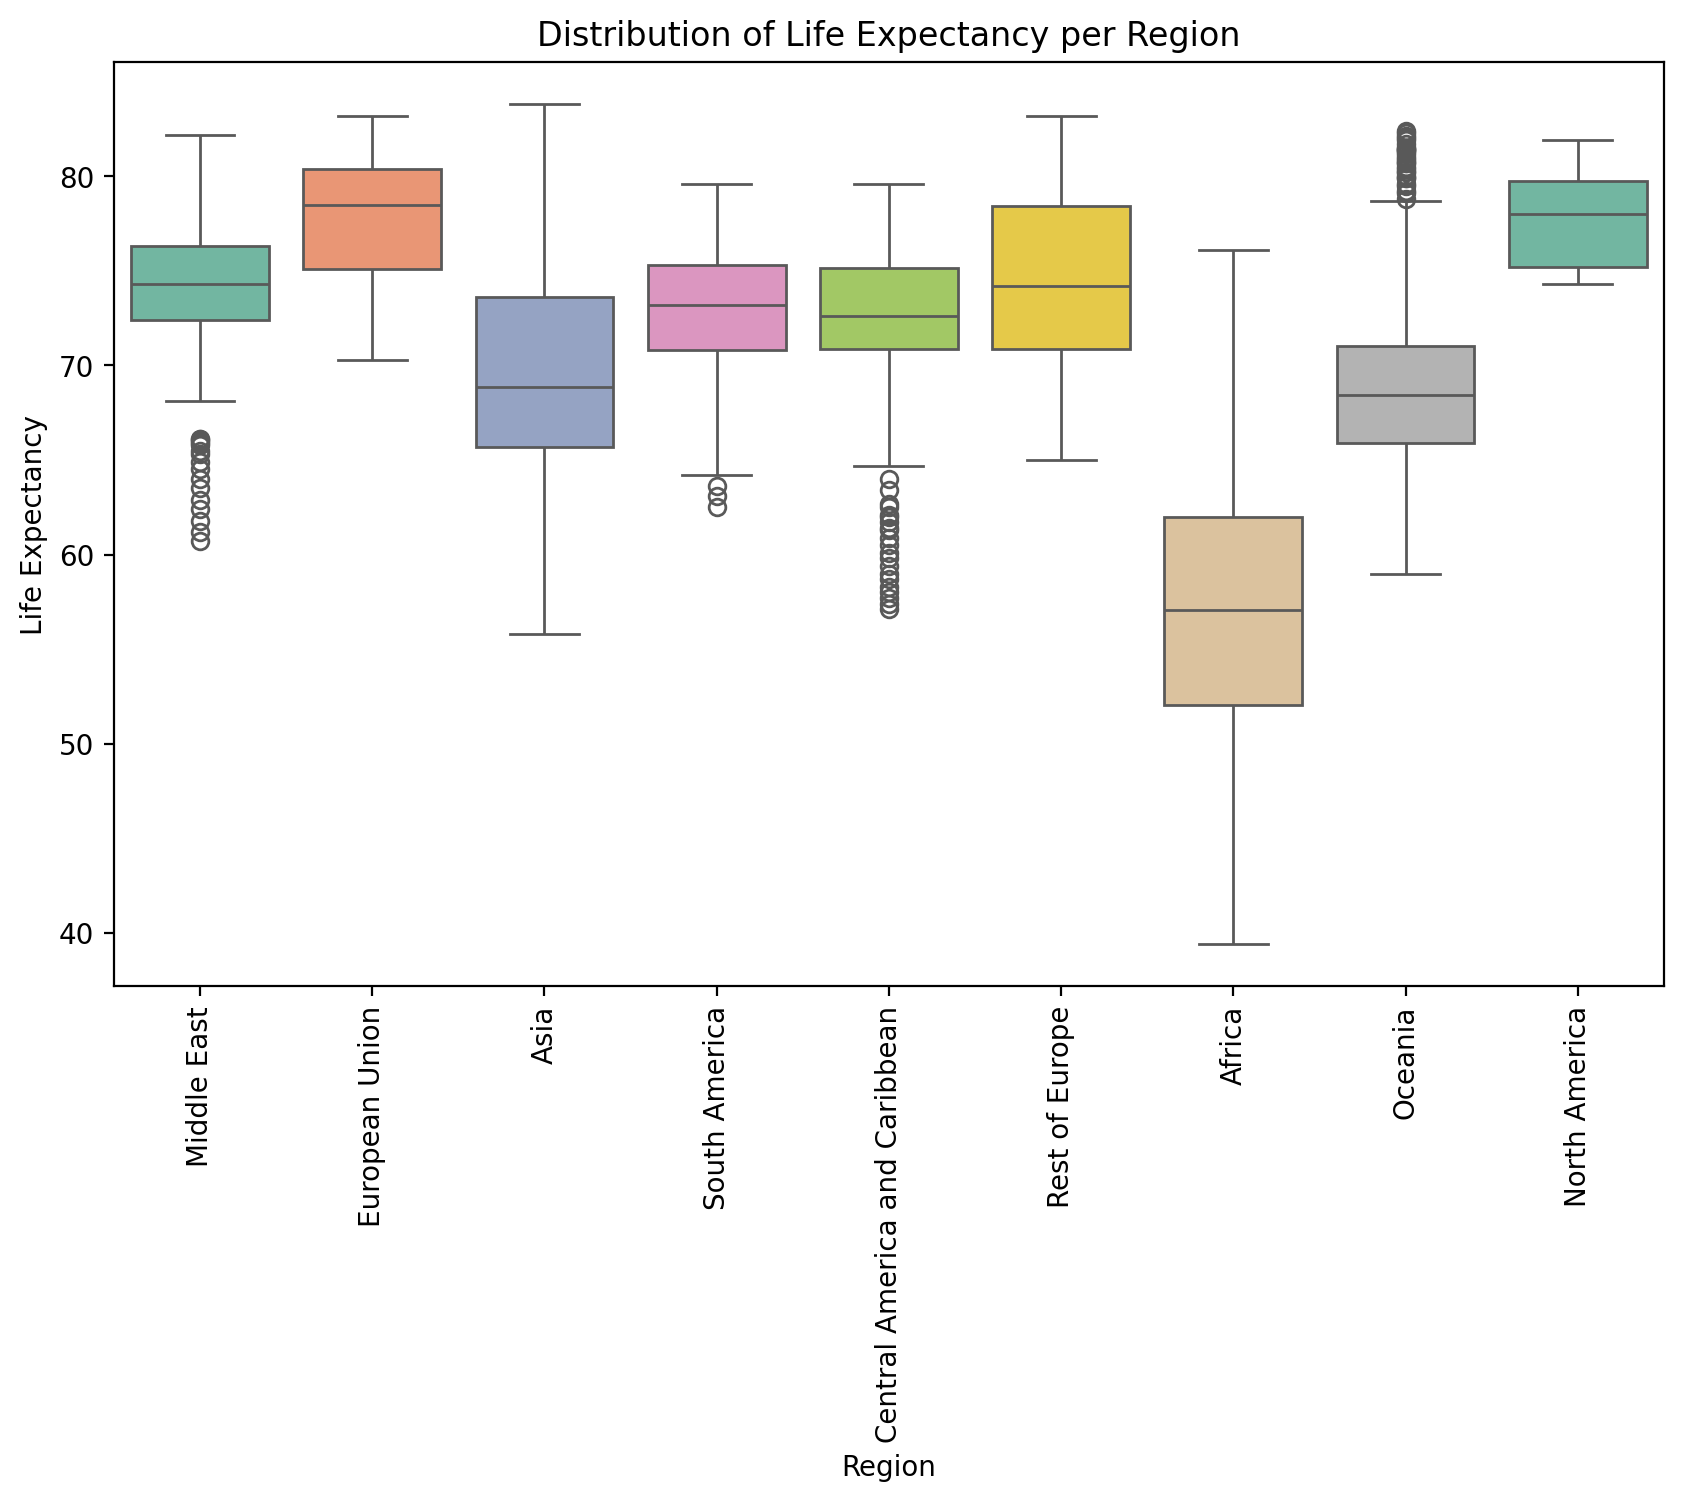

In [ ]:
# Distribution of Life Expectancy per Region

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Life_expectancy', data=data, palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribution of Life Expectancy per Region')
plt.xlabel('Region')
plt.ylabel('Life Expectancy')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='GDP_per_capita', ylabel='Life_expectancy'>

Text(0.5, 1.0, 'Life Expectancy vs. GDP per Capita')

Text(0.5, 0, 'GDP per Capita')

Text(0, 0.5, 'Life Expectancy')

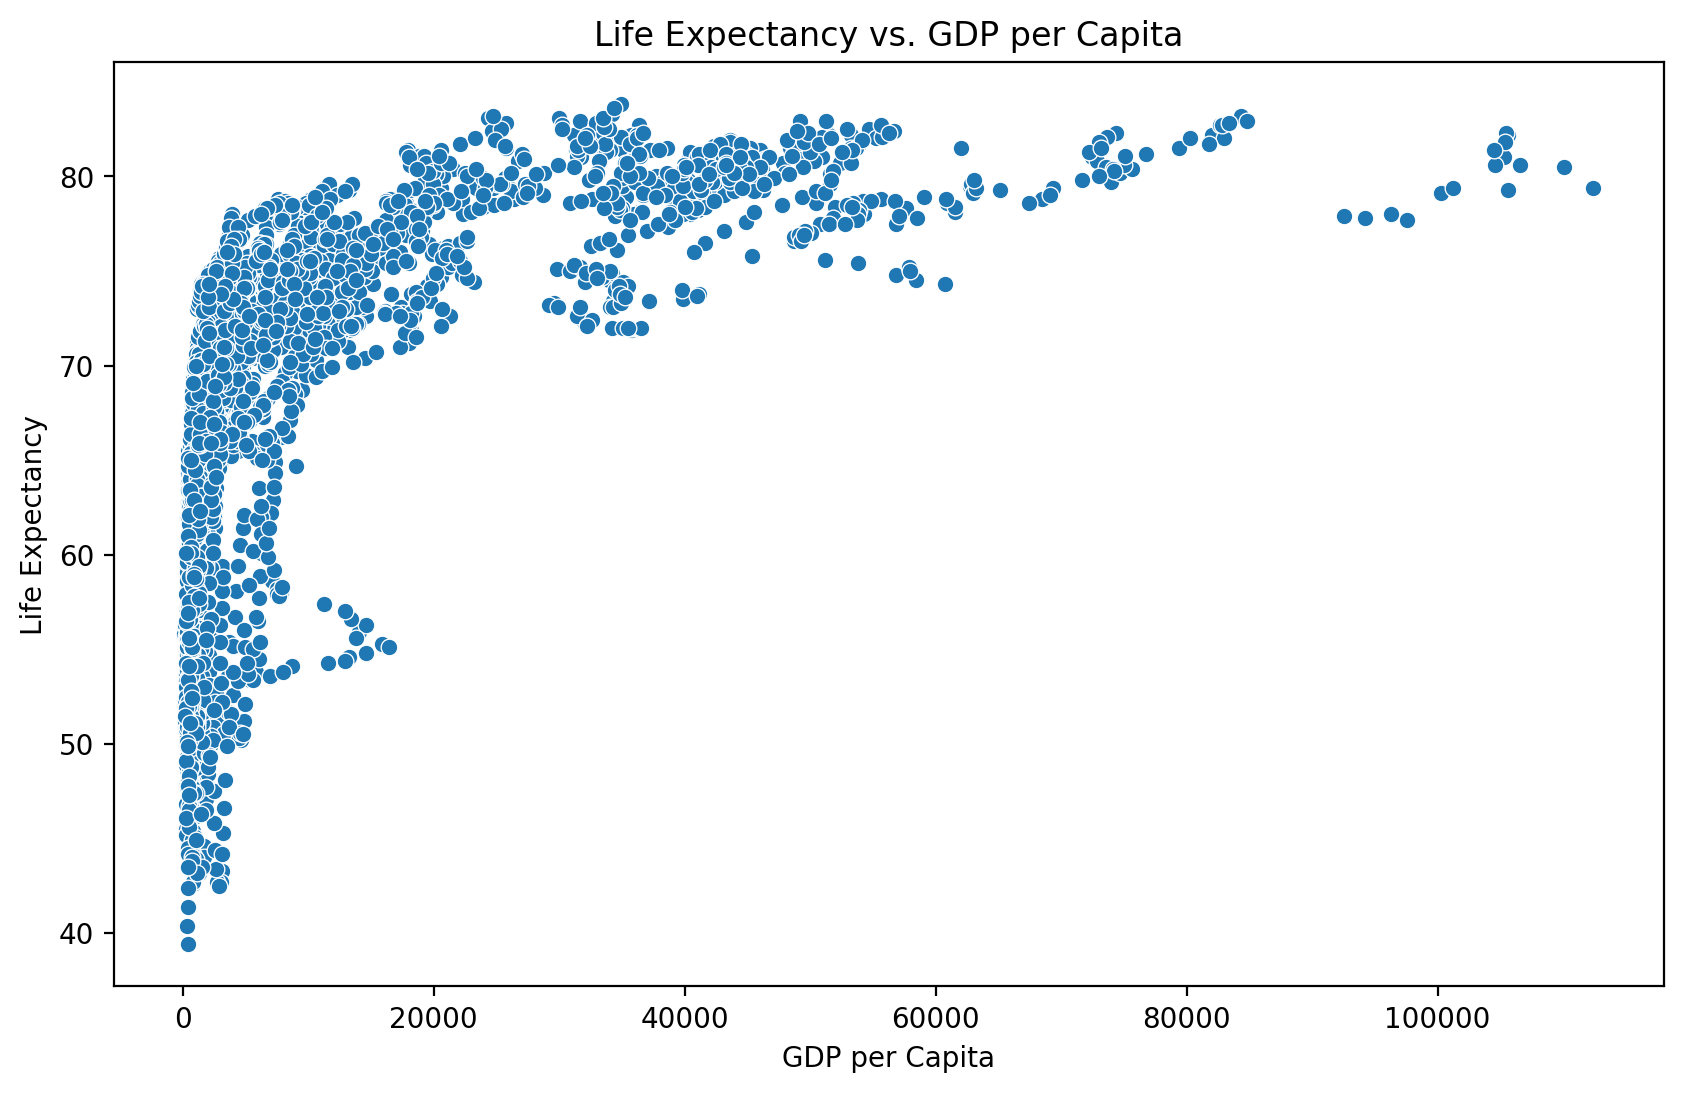

In [ ]:
# life expectancy and GDP per capita in 2015

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_capita', y='Life_expectancy', data=data)
plt.title('Life Expectancy vs. GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='GDP_per_capita', ylabel='Life_expectancy'>

Text(0.5, 1.0, 'Life Expectancy vs. GDP per Capita')

Text(0.5, 0, 'GDP per Capita')

Text(0, 0.5, 'Life Expectancy')

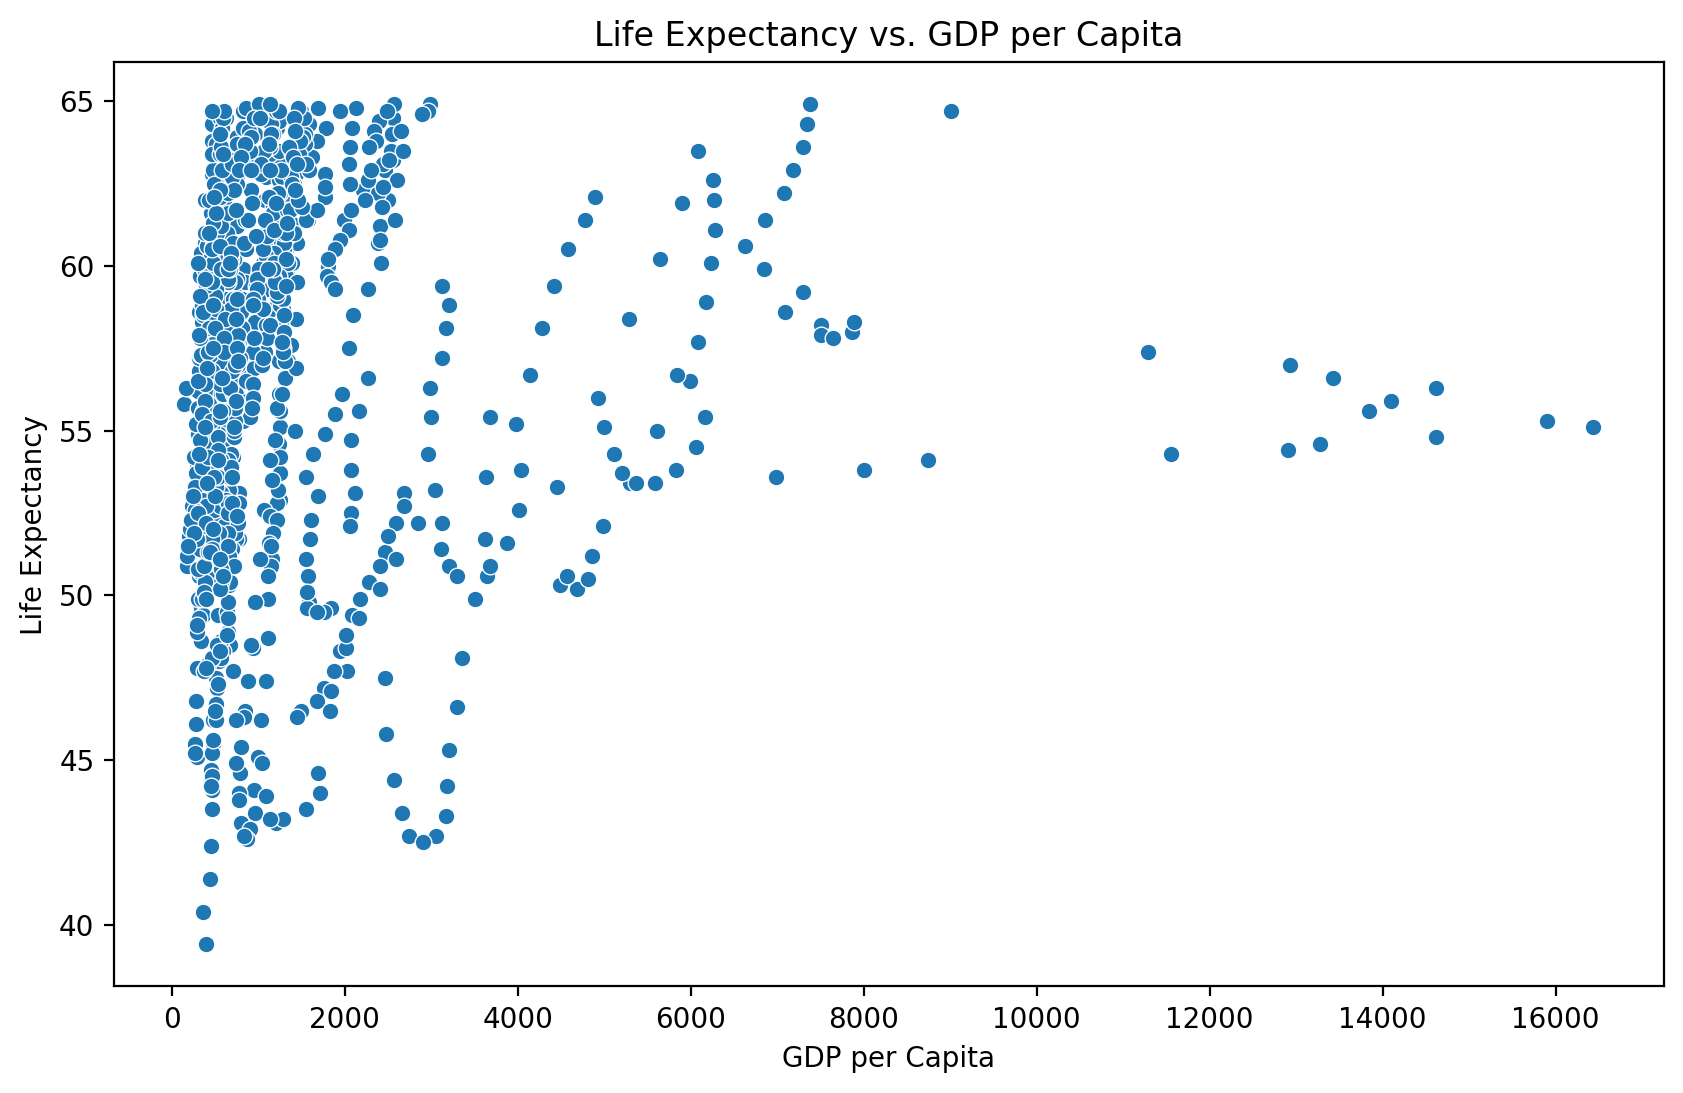

In [ ]:
# GDP per Capita for countries with low life expectancy

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_capita', y='Life_expectancy', data=data[data['Life_expectancy'] < 65])
plt.title('Life Expectancy vs. GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()

In [ ]:
data[data['Life_expectancy'] < 65]['GDP_per_capita'].describe()

count      833.000000
mean      1591.536615
std       2098.681614
min        148.000000
25%        550.000000
50%        920.000000
75%       1567.000000
max      16439.000000
Name: GDP_per_capita, dtype: float64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='GDP_per_capita'>

Text(0.5, 1.0, 'Distribution of GDP Per Capita for low life expectancy')

Text(0.5, 0, 'GDP Per Capita')

Text(0, 0.5, 'Life Expectancy (less than 65)')

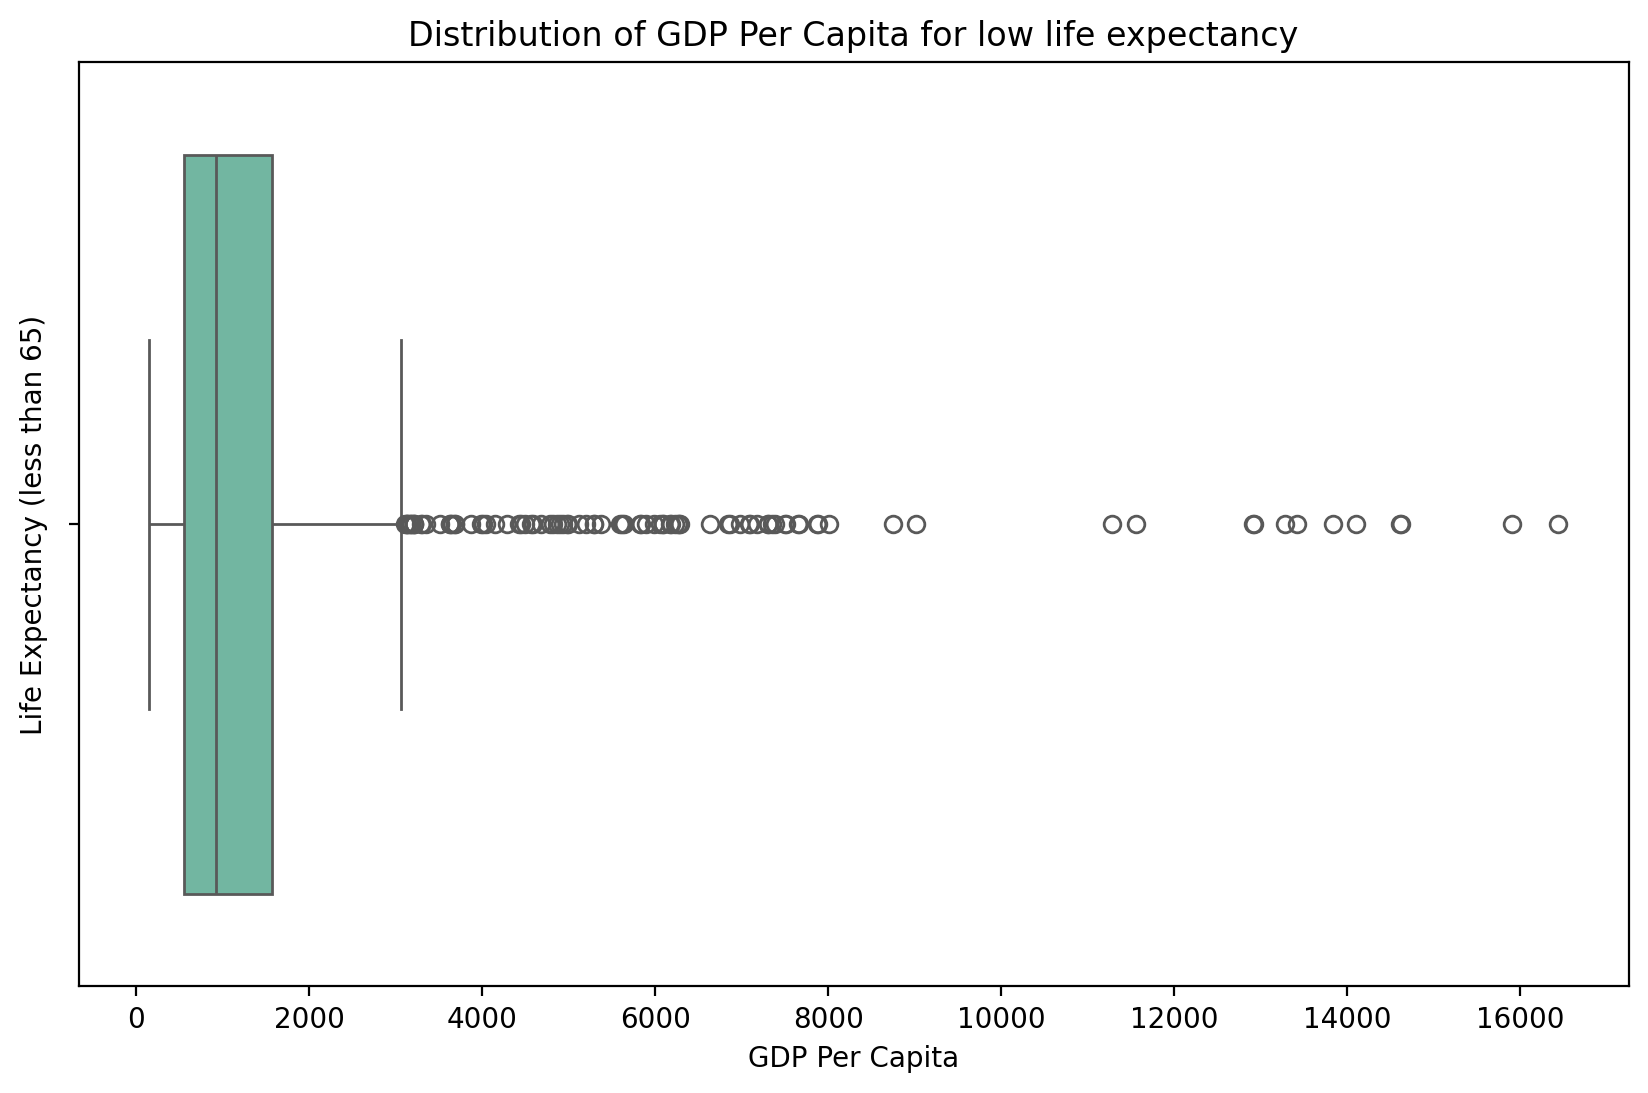

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data[data['Life_expectancy'] < 65]['GDP_per_capita'], palette='Set2')
plt.title('Distribution of GDP Per Capita for low life expectancy')
plt.xlabel('GDP Per Capita')
plt.ylabel('Life Expectancy (less than 65)')
plt.show()

The highest Gross Domestic Product (GDP) per capita among nations where life expectancy is below 65 years stands at \$16,000, with 75% of these countries having a GDP below $1,600.

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Life Expectancy Over Time for Namibia')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Life Expectancy')

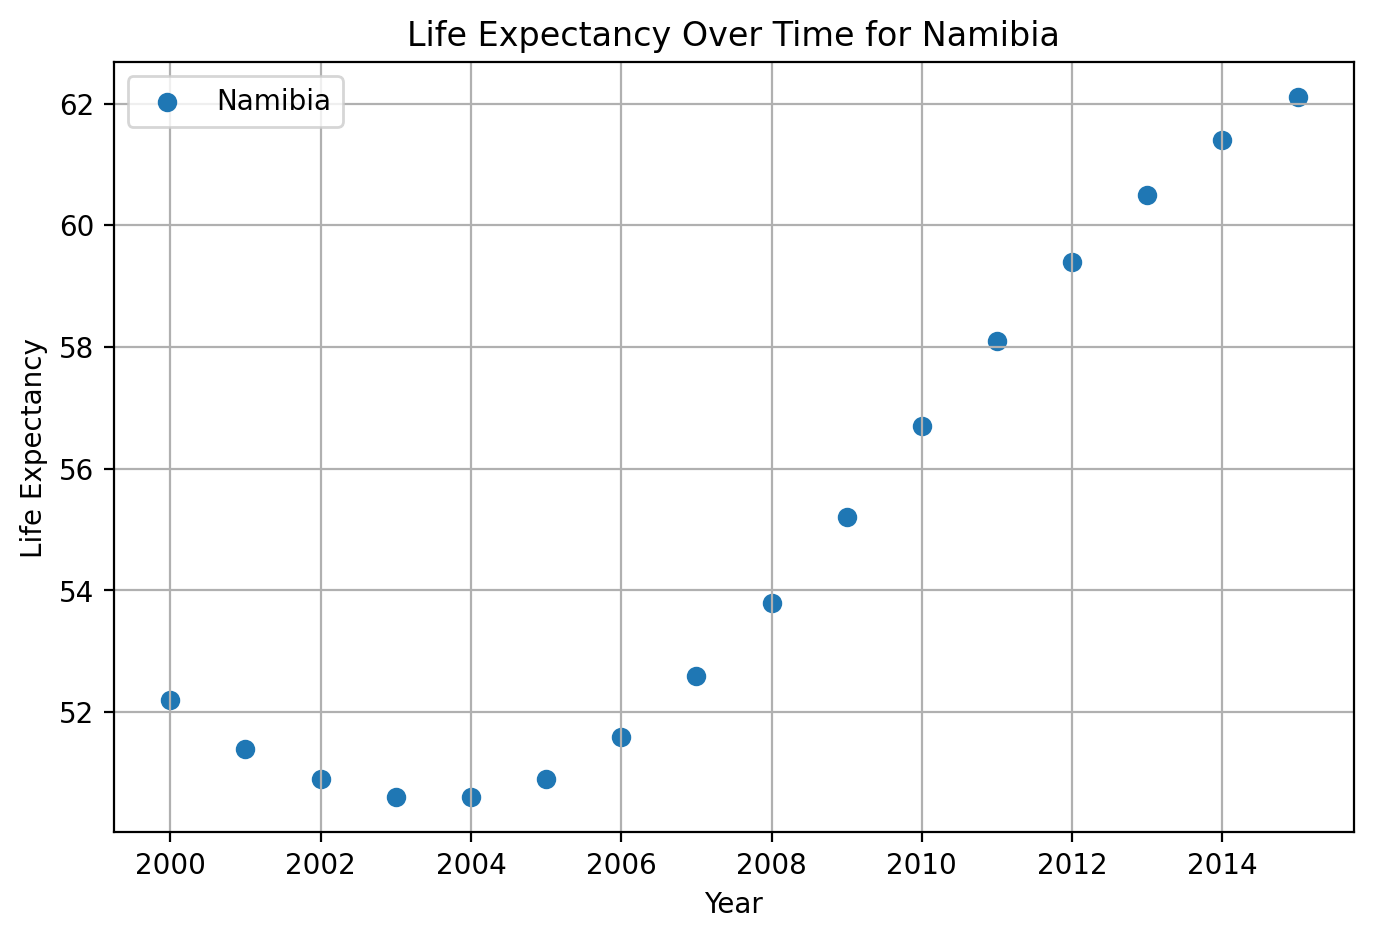

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Life Expectancy Over Time for South Africa')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Life Expectancy')

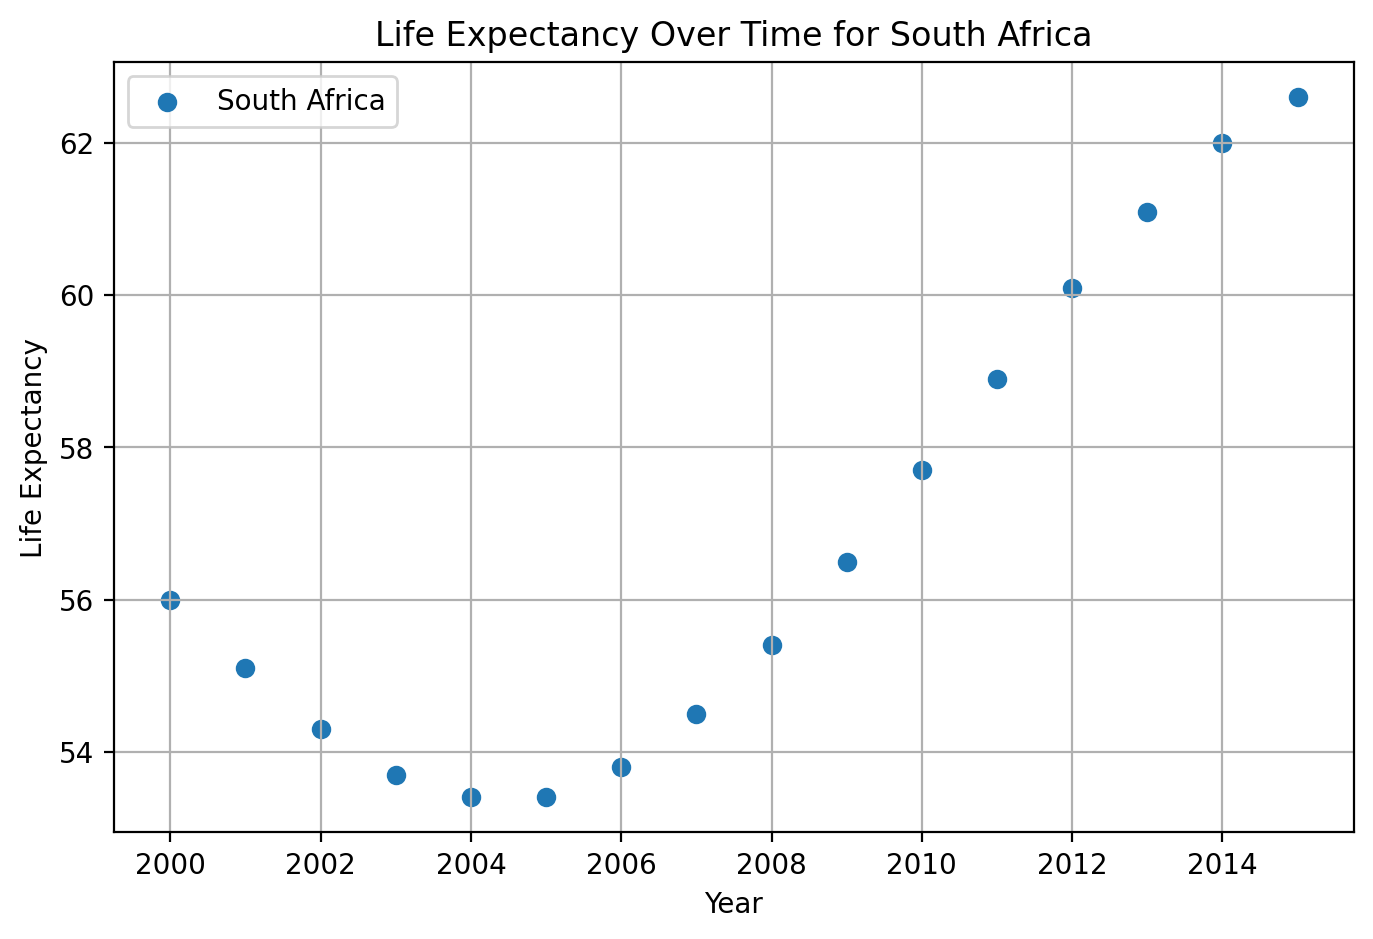

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Life Expectancy Over Time for Eswatini')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Life Expectancy')

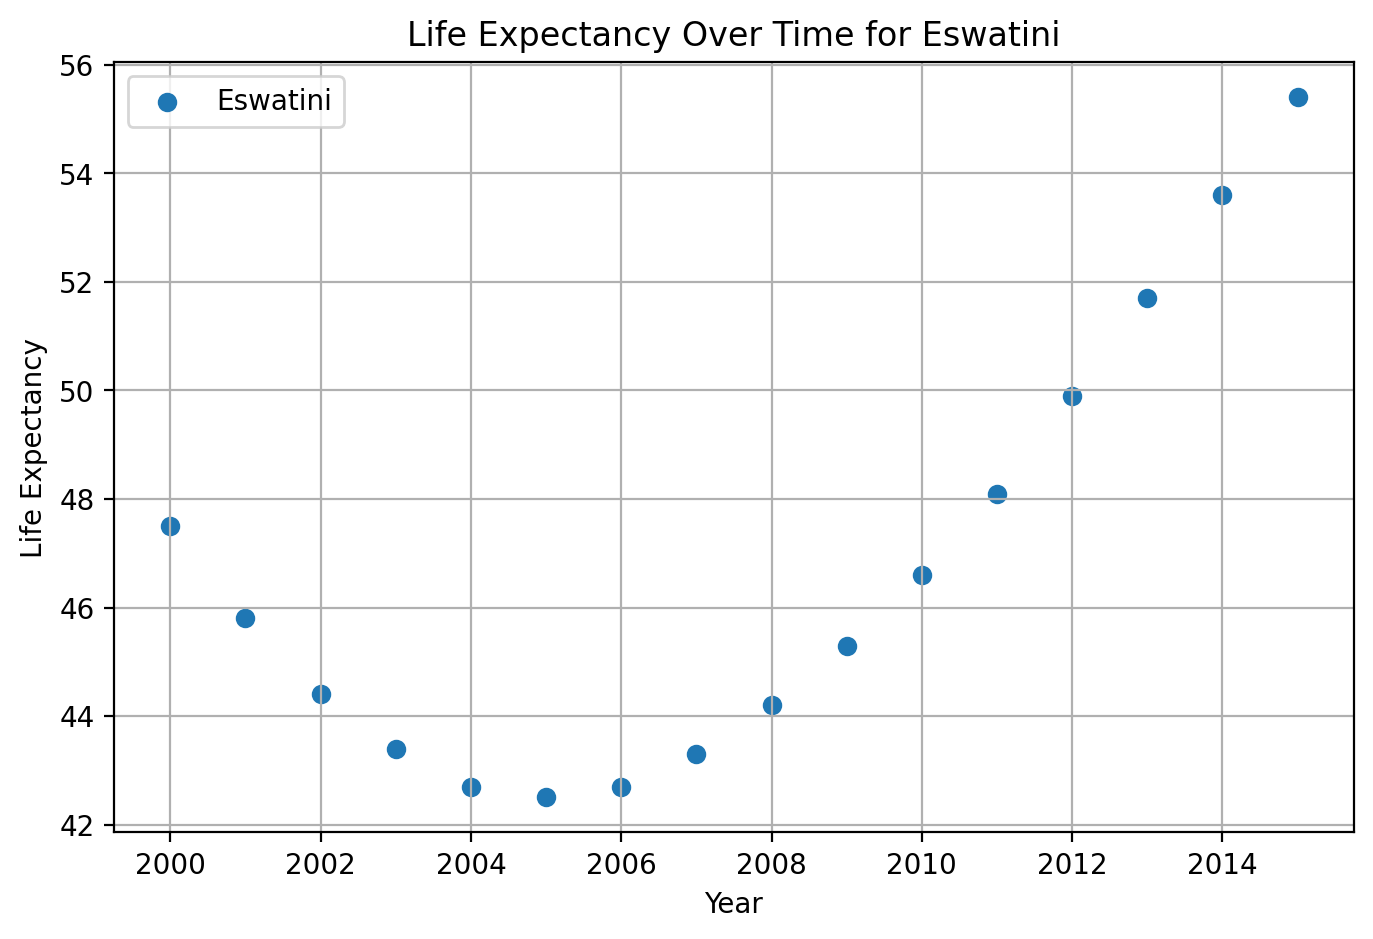

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Life Expectancy Over Time for Botswana')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Life Expectancy')

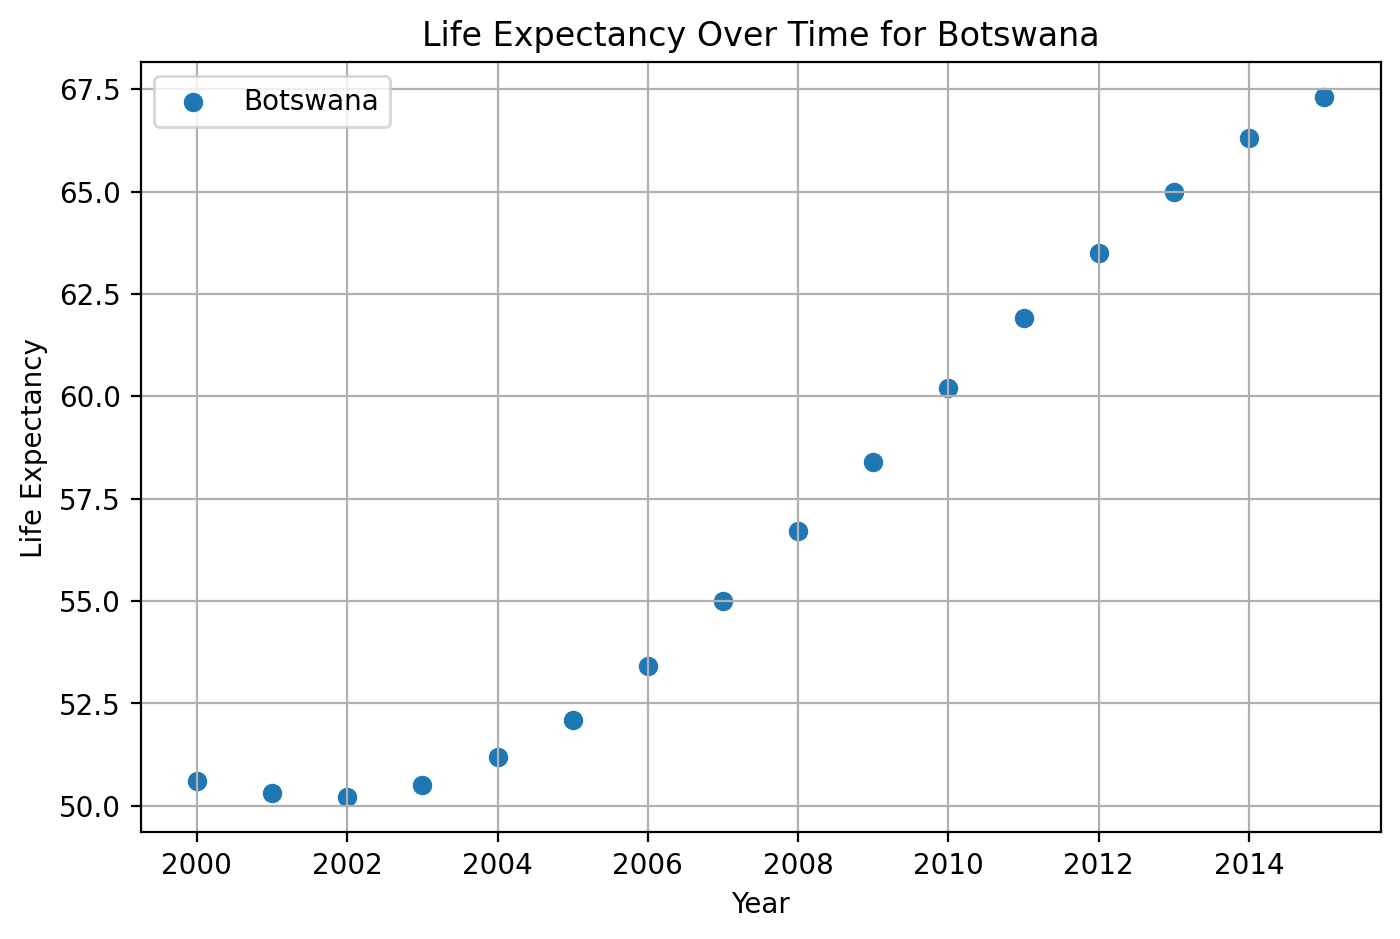

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Life Expectancy Over Time for Lesotho')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Life Expectancy')

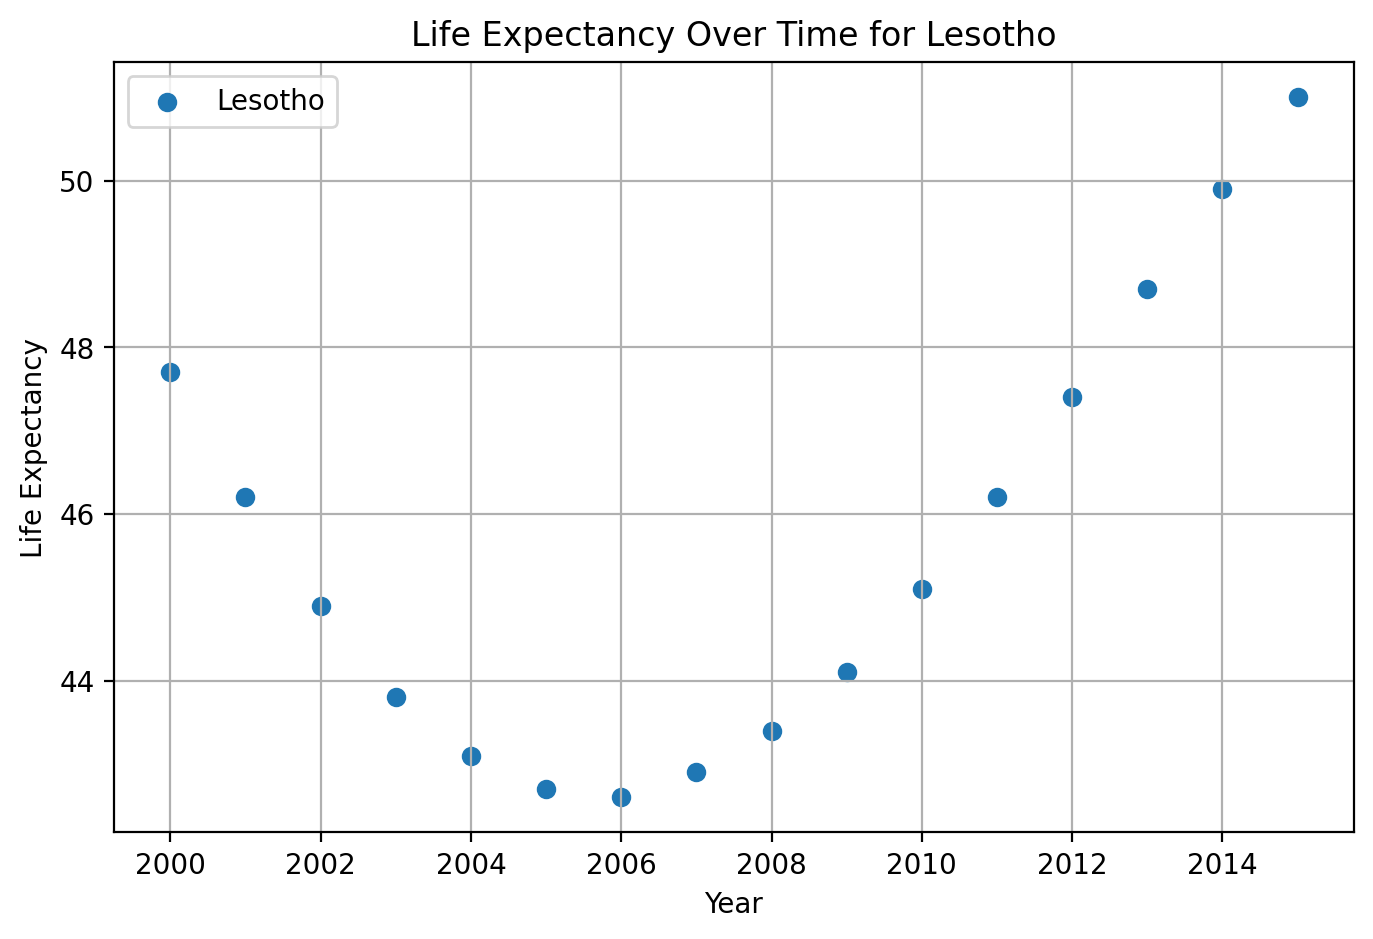

In [ ]:
# Plot life expectancy for South African countries
countries = ['Namibia', 'South Africa', 'Eswatini', 'Botswana', 'Lesotho']

for country in countries:
    plt.figure(figsize=(8, 5))
    country_data = data[data['Country'] == country]
    plt.scatter(country_data['Year'], country_data['Life_expectancy'], label=country)
    plt.title(f'Life Expectancy Over Time for {country}')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.legend()
    plt.grid(True)
    plt.show()

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Life Expectancy Over Time for Syrian Arab Republic')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Life Expectancy')

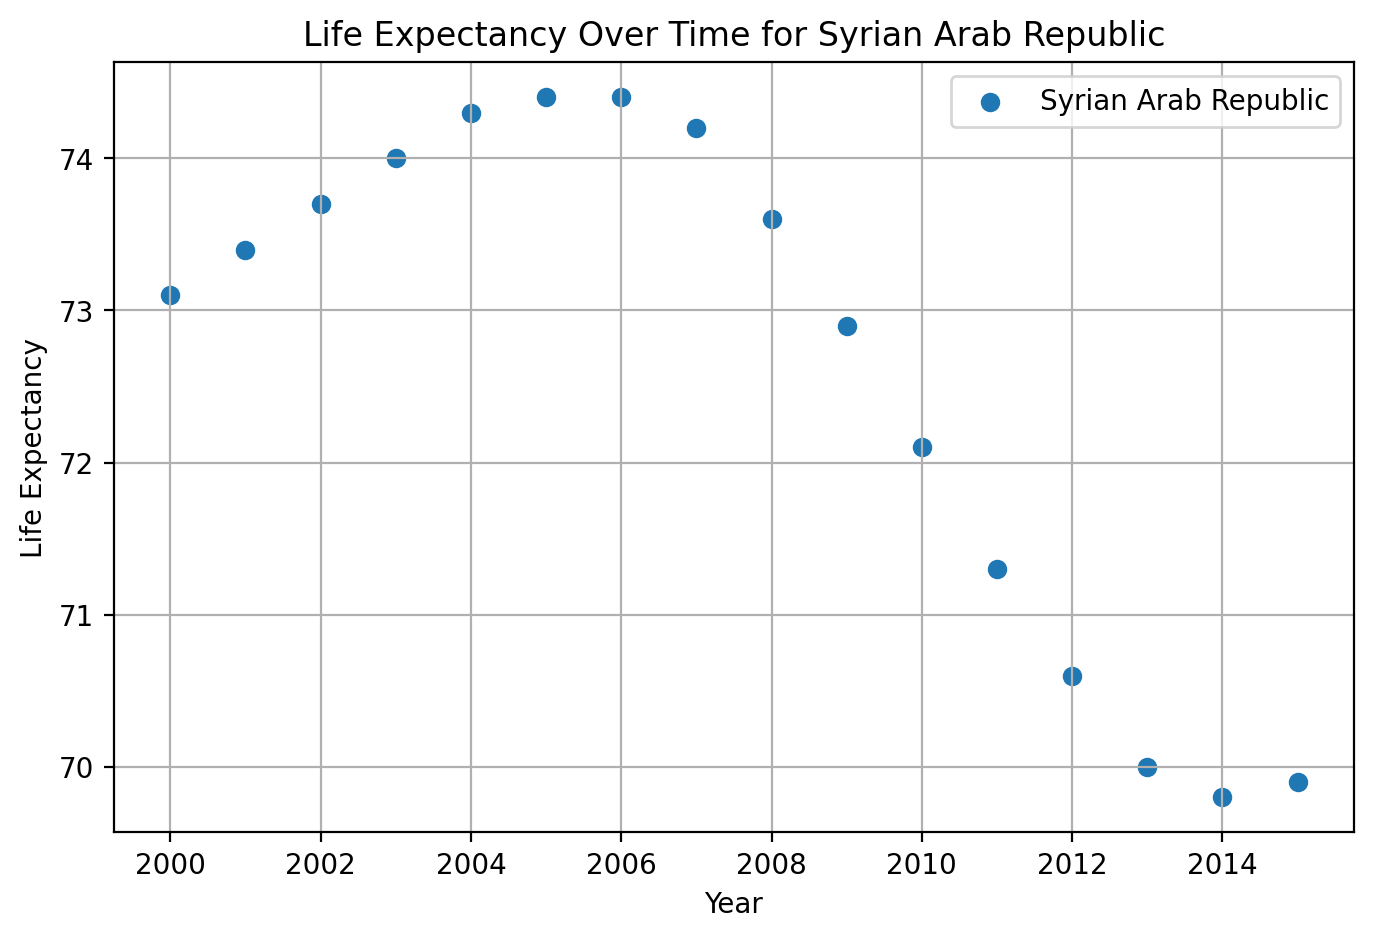

In [10]:
# Plot life expectancy timeline for Syria

plt.figure(figsize=(8, 5))
country_data = data[data['Country'] == 'Syrian Arab Republic']
plt.scatter(country_data['Year'], country_data['Life_expectancy'], label='Syrian Arab Republic')
plt.title(f'Life Expectancy Over Time for Syrian Arab Republic')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

###Adding population denisty

In [ ]:
# Load density population data

path = "/content/drive/MyDrive/countries of the world.csv"
pop = pd.read_csv(path, usecols=['Country', 'Area (sq. mi.)'])

In [ ]:
pop.head()

,Country,Area (sq. mi.)
0,Afghanistan,647500
1,Albania,28748
2,Algeria,2381740
3,American Samoa,199
4,Andorra,468


In [ ]:
# duplicate country column

data['Country_copy'] = data['Country']

In [ ]:
# delete whitespaces in Country column

pop['Country'] = pop['Country'].str.replace(' ', '')
data['Country'] = data['Country'].str.replace(' ', '')

In [ ]:
# match countries that have different wordings

pop.loc[pop['Country'] == 'Turkey', 'Country'] = 'Turkiye'
pop.loc[pop['Country'] == 'Syria', 'Country'] = 'SyrianArabRepublic'
pop.loc[pop['Country'] == 'Laos', 'Country'] = 'LaoPDR'
pop.loc[pop['Country'] == 'Iran', 'Country'] = 'Iran,IslamicRep.'
pop.loc[pop['Country'] == 'Venezuela', 'Country'] = 'Venezuela,RB'
pop.loc[pop['Country'] == 'SaoTome&Principe', 'Country'] = 'SaoTomeandPrincipe'
pop.loc[pop['Country'] == 'Slovakia', 'Country'] = 'SlovakRepublic'
pop.loc[pop['Country'] == 'SaintLucia', 'Country'] = 'St.Lucia'
pop.loc[pop['Country'] == 'CapeVerde', 'Country'] = 'CaboVerde'
pop.loc[pop['Country'] == 'Burma', 'Country'] = 'Myanmar'
pop.loc[pop['Country'] == 'EastTimor', 'Country'] = 'Timor-Leste'
pop.loc[pop['Country'] == 'Trinidad&Tobago', 'Country'] = 'TrinidadandTobago'
pop.loc[pop['Country'] == 'Egypt', 'Country'] = 'Egypt,ArabRep.'
pop.loc[pop['Country'] == 'Russia', 'Country'] = 'RussianFederation'
pop.loc[pop['Country'] == 'CzechRepublic', 'Country'] = 'Czechia'
pop.loc[pop['Country'] == 'Bosnia&Herzegovina', 'Country'] = 'BosniaandHerzegovina'
pop.loc[pop['Country'] == 'Antigua&Barbuda', 'Country'] = 'AntiguaandBarbuda'
pop.loc[pop['Country'] == 'Micronesia,Fed.St.', 'Country'] = 'Micronesia,Fed.Sts.'
pop.loc[pop['Country'] == 'SaintVincentandtheGrenadines', 'Country'] = 'St.VincentandtheGrenadines'
pop.loc[pop['Country'] == 'Yemen', 'Country'] = 'Yemen,Rep.'
pop.loc[pop['Country'] == 'CentralAfricanRep.', 'Country'] = 'CentralAfricanRepublic'
pop.loc[pop['Country'] == 'Brunei', 'Country'] = 'BruneiDarussalam'
pop.loc[pop['Country'] == 'Kyrgyzstan', 'Country'] = 'KyrgyzRepublic'
pop.loc[pop['Country'] == 'Congo,Repub.ofthe', 'Country'] = 'Congo,Rep.'
pop.loc[pop['Country'] == 'Macedonia', 'Country'] = 'NorthMacedonia'

In [ ]:
# merge with main data file

merged_data = pd.merge(data, pop, how='left', on='Country')
merged_data.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Country_copy,Area (sq. mi.)
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,11006,78.53,4.9,4.8,7.8,0,1,76.5,Turkiye,780580.0
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,25742,46.44,0.6,0.5,9.7,1,0,82.8,Spain,504782.0
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,1076,1183.21,27.1,28.0,5.0,0,1,65.4,India,3287590.0
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,4146,0.75,5.7,5.5,7.9,0,1,67.0,Guyana,214970.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,33995,7.91,1.2,1.1,12.8,1,0,81.7,Israel,20770.0


In [ ]:
merged_data[merged_data['Area (sq. mi.)'].isnull()]['Country'].value_counts()

Country
Eswatini      16
Montenegro    16
Name: count, dtype: int64

In [ ]:
# impute missing values for 2 countries

merged_data.loc[merged_data['Country'] == 'Montenegro', 'Area (sq. mi.)'] = 5332.8
merged_data.loc[merged_data['Country'] == 'Eswatini', 'Area (sq. mi.)'] = 6704.3

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [ ]:
merged_data['Pop. Density (per sq. mi.)'] = \
(merged_data['Population_mln'] * 1000000)/merged_data['Area (sq. mi.)']

In [ ]:
merged_data.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Country_copy,Area (sq. mi.),Pop. Density (per sq. mi.)
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,78.53,4.9,4.8,7.8,0,1,76.5,Turkiye,780580.0,100.604679
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,46.44,0.6,0.5,9.7,1,0,82.8,Spain,504782.0,92.000111
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,1183.21,27.1,28.0,5.0,0,1,65.4,India,3287590.0,359.901934
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,0.75,5.7,5.5,7.9,0,1,67.0,Guyana,214970.0,3.488859
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,7.91,1.2,1.1,12.8,1,0,81.7,Israel,20770.0,380.837747


In [ ]:
# delete Country column and rename Country_copy to Country

merged_data.drop('Country', axis=1, inplace=True)
merged_data.rename(columns={'Country_copy': 'Country'}, inplace=True)

In [ ]:
# decode country and region as numeric values

le = LabelEncoder()

# Encode country and region columns
merged_data['Country'] = le.fit_transform(merged_data['Country'])
merged_data['Region'] = le.fit_transform(merged_data['Region'])

###Correlation Analysis

In [ ]:
# Check correlation between variables

merged_data.corr()

,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,...,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Country,Area (sq. mi.),Pop. Density (per sq. mi.)
Region,1.000000e+00,1.152415e-14,-0.531623,-0.538272,-0.477791,0.273603,0.149712,0.240532,0.551842,0.267026,...,-0.061179,-0.478165,-0.475939,0.480930,1.888239e-01,-1.888239e-01,0.521706,7.840167e-02,1.544833e-01,-0.076188
Year,1.152415e-14,1.000000e+00,-0.172402,-0.176393,-0.158660,-0.000611,0.176824,0.085945,0.161422,0.139858,...,0.015158,-0.044901,-0.048038,0.150539,-5.026601e-15,4.975598e-15,0.174359,4.039430e-15,1.177259e-14,0.025257
Infant_deaths,-5.316226e-01,-1.724017e-01,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,...,0.007622,0.491192,0.477639,-0.788513,-4.758662e-01,4.758662e-01,-0.920032,-6.098727e-02,-6.464115e-02,-0.129744
Under_five_deaths,-5.382716e-01,-1.763926e-01,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,...,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,4.271342e-01,-0.920419,-5.769363e-02,-5.924296e-02,-0.121925
Adult_mortality,-4.777908e-01,-1.586596e-01,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,...,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,4.293748e-01,-0.945360,9.556505e-03,-2.388763e-02,-0.162455
Alcohol_consumption,2.736031e-01,-6.105222e-04,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,...,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,-6.703661e-01,0.399159,-5.632926e-02,9.419682e-02,-0.055408
Hepatitis_B,1.497121e-01,1.768241e-01,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,...,-0.082396,-0.208453,-0.213794,0.347643,1.135340e-01,-1.135340e-01,0.417804,2.793291e-03,-6.925698e-02,0.097901
Measles,2.405318e-01,8.594472e-02,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,...,-0.098222,-0.340705,-0.366970,0.498391,2.986933e-01,-2.986933e-01,0.490019,-1.963750e-02,4.541695e-02,0.081876
BMI,5.518419e-01,1.614225e-01,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,...,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,-2.432870e-01,0.598423,6.938033e-02,2.783725e-02,-0.052276
Polio,2.670261e-01,1.398584e-01,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,...,-0.033486,-0.312685,-0.306998,0.552765,2.832601e-01,-2.832601e-01,0.641217,3.052344e-02,3.217650e-02,0.102201


<Figure size 1800x700 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

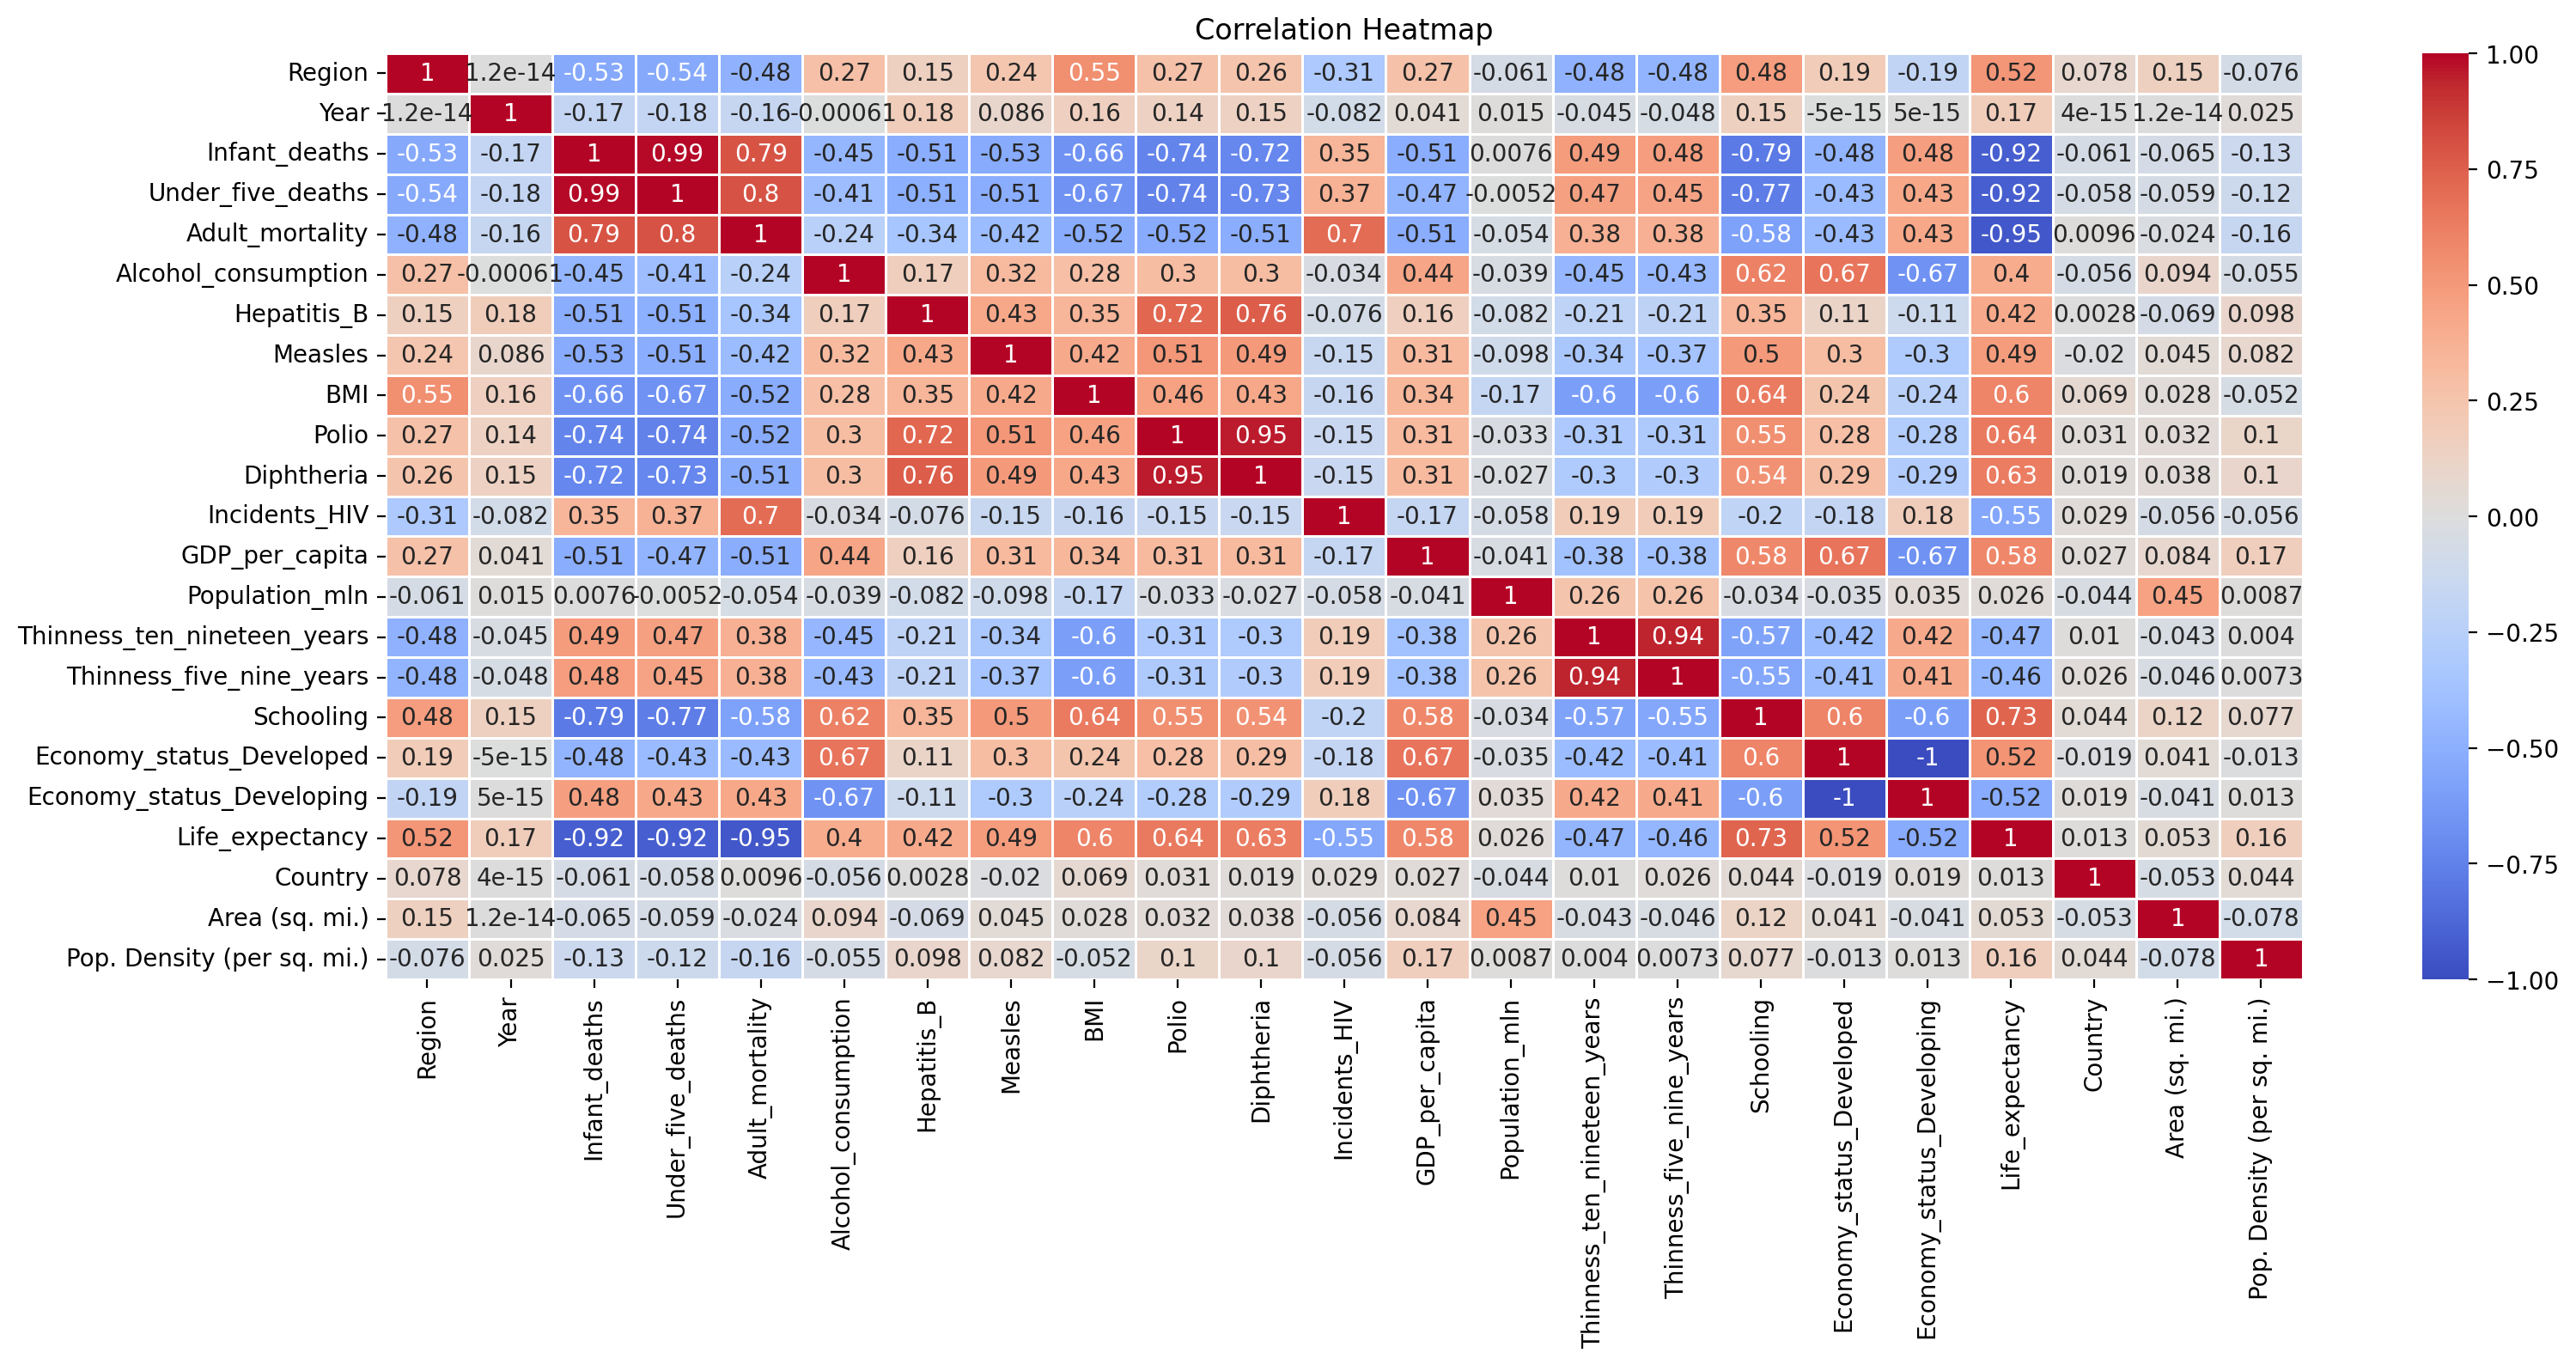

In [ ]:
plt.figure(figsize=(18, 7))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# identify columns with correlation >|0.5|
cols = ['Region', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
        'BMI', 'Polio', 'Diphtheria', 'Schooling', 'Incidents_HIV',
        'GDP_per_capita', 'Economy_status_Developed', 'Economy_status_Developing']

###Modelling

In [ ]:
X = merged_data[cols]
y = merged_data['Life_expectancy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
print("Size of the training set:", len(X_train))
print("Size of the testing set:",len(X_test))

Fully Recovered vs Not Recovered Sample
Size of the training set: 2004
Size of the testing set: 860


In [ ]:
# Linear Regression
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

LinearRegression()

Mean Squared Error (MSE): 1.8946329347544588
R-squared: 0.9779564597708688


In [ ]:
# Decision Tree

# Use GridSearchCV to find optimal parameters
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Decision Tree with best parameters
best_model = DecisionTreeRegressor(random_state=42, **best_params)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5, random_state=42)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean Squared Error (MSE): 0.9311895994832038
R-squared: 0.9891658616185637


In [ ]:
# Random Forest

# Use GridSearchCV to find optimal parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Random Forest with best parameters
best_model = RandomForestRegressor(random_state=42, **best_params)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

RandomForestRegressor(n_estimators=300, random_state=42)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error (MSE): 0.49987953901807997
R-squared: 0.9941840371683961


####Cross-validation technique

In [ ]:
# Linear Regression

model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

print("Cross-Validation Mean MSE:", mean_mse)
print("Cross-Validation Standard Deviation MSE:", std_mse)

Cross-Validation Mean MSE: 1.9050848736585266
Cross-Validation Standard Deviation MSE: 0.0850724526265048


In [ ]:
# Decision Tree

model = DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

print("Cross-Validation Mean MSE:", mean_mse)
print("Cross-Validation Standard Deviation MSE:", std_mse)

Cross-Validation Mean MSE: 0.8237020209647827
Cross-Validation Standard Deviation MSE: 0.07737666206634307


In [ ]:
# Random Forest
model = RandomForestRegressor(min_samples_leaf=1,
                              min_samples_split=2,
                              n_estimators=300,
                              random_state=42)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

print("Cross-Validation Mean MSE:", mean_mse)
print("Cross-Validation Standard Deviation MSE:", std_mse)

Cross-Validation Mean MSE: 0.3575236550250821
Cross-Validation Standard Deviation MSE: 0.023146234855182926
